## Heart Disease Prediction

### Problem Statement
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?



## Create Data Dictionary

1- age : Age in years

2- sex : (1-male , 2-female)

3- cp : Chest pain type
> 0: Typical angina: chest pain related decrease blood supply to the heart

> 1: Atypical angina: chest pain not related to heart

> 2: Non-anginal pain: typically esophageal spasms (non heart related)

> 3: Asymptomatic: chest pain not showing signs of disease

4- trestbps : resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

5- chol : serum cholestrol in mg/dl
> serum = LDL + HDL + .2 * triglycerides

> above 200 is cause for concern

6- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

> '>126' mg/dL signals diabetes

7- restecg : resting electrocardiographic results
> 0: Nothing to note

>1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat

>2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber.

8- thalach : maximum heart rate achieved

9- exang : exercise induced angina (1 = yes; 0 = no)

10- oldpeak : ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more

11- slope : the slope of the peak exercise ST segment

> 0: Upsloping: better heart rate with excercise (uncommon)

>1: Flatsloping: minimal change (typical healthy heart)

>2: Downslopins: signs of unhealthy heart

12- ca - number of major vessels (0-3) colored by flourosopy
> colored vessel means the doctor can see the blood passing through

> the more blood movement the better (no clots)

13- thal : thalium stress result
> 1,3: normal
> 6: fixed defect: used to be defect but ok now
> 7: reversable defect: no proper blood movement when excercising

14- target : have disease or not (1=yes, 0=no) (= the predicted attribute)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [46]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [47]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


1    165
0    138
Name: target, dtype: int64


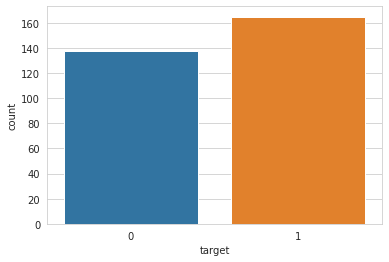

In [48]:
print(data.target.value_counts())
sns.set_style('whitegrid')
sns.countplot(x = 'target', data = data)

We have 165 persons with heart diseases and 138 not having heart disease.

In [49]:
categorical_variable = []
continuous_variable = []

for column in data.columns:
  if(len(data[column].unique())<=10):
    categorical_variable.append(column)
  else:
    continuous_variable.append(column)


In [50]:
categorical_variable

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [51]:
continuous_variable

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

### Working with model 1

In [52]:
dataset = data.copy()
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


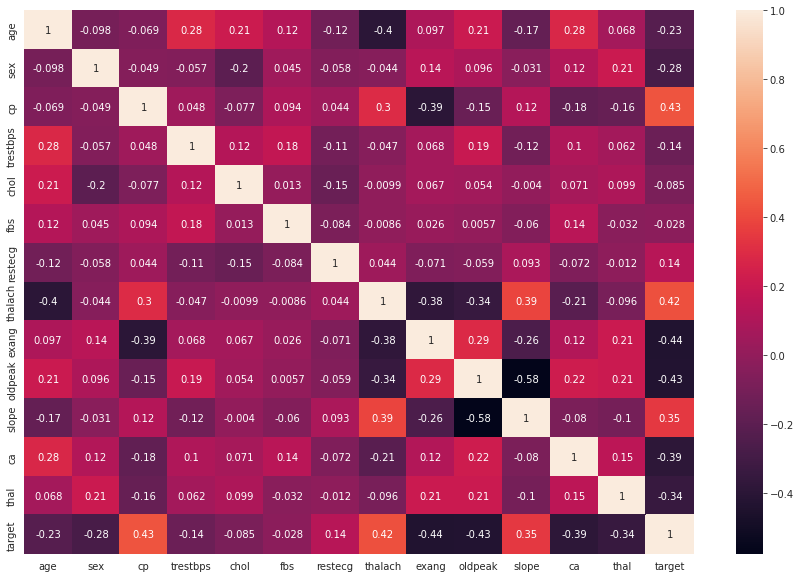

In [53]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

In [54]:
X = dataset.drop(columns='target',axis=1)
y = dataset['target']

In [55]:
print("Shape of dataset ",dataset.shape)
print("Shape of X ", X.shape)
print("Shape of Y ",y.shape)
print(X.columns)

Shape of dataset  (303, 14)
Shape of X  (303, 13)
Shape of Y  (303,)
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [56]:
from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier 

X_train,X_test ,y_train,y_test = tts(X,y,test_size=0.2,random_state = 42)
model1 = RandomForestClassifier(n_estimators=20)
model1.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
pred1 = model1.predict(X_test)
pred1[:10]

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 1])

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred1)

array([[24,  5],
       [ 6, 26]])

In [59]:
from sklearn.metrics import accuracy_score
print(f"Accuracy of model is {round(accuracy_score(y_test, pred1)*100, 2)}%")

Accuracy of model is 81.97%


## Hyperparameter Tuning

In [60]:
from sklearn.model_selection import RandomizedSearchCV

classifier = RandomForestClassifier(n_jobs=-1)


In [61]:
from scipy.stats import randint
param_dist={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,31),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,31),
              }

In [62]:
search_clfr = RandomizedSearchCV(classifier, param_distributions = param_dist, n_jobs=-1, n_iter = 40, cv = 9)

In [63]:
search_clfr.fit(X_train, y_train)

RandomizedSearchCV(cv=9, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [64]:
params = search_clfr.best_params_
score = search_clfr.best_score_
print(params)
print(score)

{'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'max_features': 6, 'min_samples_leaf': 6, 'n_estimators': 500}
0.8266856600189934


In [65]:
claasifier=RandomForestClassifier(n_jobs=-1, n_estimators=400,bootstrap= False,criterion='gini',max_depth=5,max_features=3,min_samples_leaf= 7)

In [69]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [70]:
pred2 = classifier.predict(X_test)
confusion_matrix(y_test,pred2)

array([[24,  5],
       [ 5, 27]])

In [71]:
print(f"Accuracy is {round(accuracy_score(y_test, classifier.predict(X_test))*100,2)}%")

Accuracy is 83.61%


In [72]:
import pickle
pickle.dump(classifier,open('heart.pkl','wb'))